In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [7]:
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


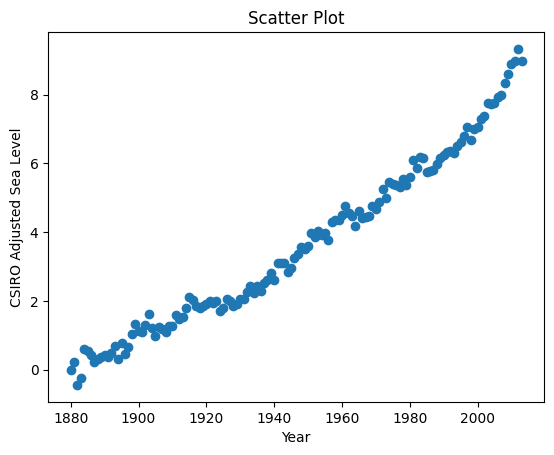

In [9]:
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"])
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Scatter Plot')
plt.show()

In [11]:
slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

Text(0.5, 1.0, 'Sea Level Rise Prediction by 2050')

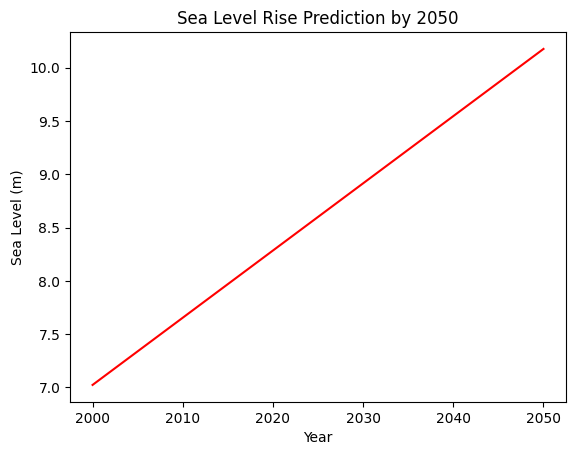

In [15]:
future_years = list(range(2000, 2051))  # From 2000 to 2050
future_sea_levels = [slope * year + intercept for year in future_years]
plt.plot(future_years, future_sea_levels, color='red')  # Line of best fit
plt.xlabel('Year')
plt.ylabel('Sea Level (m)')
plt.title('Sea Level Rise Prediction by 2050')

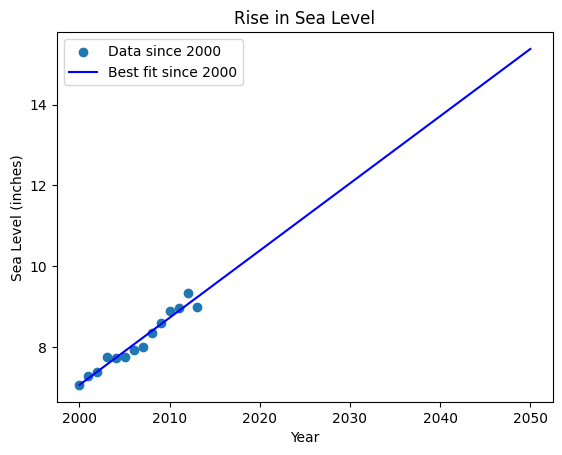

In [20]:
recent_years = [year for year in df["Year"] if year >= 2000]
recent_sea_levels = [df["CSIRO Adjusted Sea Level"][i] for i, year in enumerate(df["Year"]) if year >= 2000]

# Scatter plot
plt.scatter(recent_years, recent_sea_levels, label='Data since 2000')

# Linear regression for the filtered data (2000 to most recent)
slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(recent_years, recent_sea_levels)

# Plot the new line of best fit through 2050
future_years_recent = list(range(2000, 2051))
future_sea_levels_recent = [slope_recent * year + intercept_recent for year in future_years_recent]
plt.plot(future_years_recent, future_sea_levels_recent, color='blue', label='Best fit since 2000')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

# Show plot
plt.show()